# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [0]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [0]:
#Code
# reading csv
driving_licenses_df = pd.read_csv("saudi-arabia-driving-licenses-2004-2008.csv", sep=";")
traffic_accidents_df = pd.read_csv("saudi-arabia-traffic-accidents-2008.csv", sep=";")

# slicing the first extra columns
traffic_accidents_df = traffic_accidents_df.iloc[:,2:]
driving_licenses_df = driving_licenses_df.iloc[:,1:]

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code
print(traffic_accidents_df.head(10))
print(driving_licenses_df.head(10))

     Year            Region  ...   Value                  geo_point_2d
0  (2016)            Makkah  ...  12383n   21.628962766, 41.2636898334
1  (2016)    Eastern Region  ...   1113n  23.2883307307, 50.1478302439
2  (2016)            Tabouk  ...    434n    27.90165499, 37.2598581394
3  (2016)              Hail  ...    299n   27.400845724, 41.4406960508
4  (2016)              Hail  ...  10199n   27.400845724, 41.4406960508
5  (2016)  Northern Boarder  ...    193n   30.197074783, 41.8171186952
6  (2017)             Jazan  ...  22161n  17.2072313962, 42.6525807422
7  (2017)           Al-Jouf  ...  10469n  29.9677445762, 39.5570371172
8  (2017)             Total  ...   7489n                           NaN
9  (2016)  Northern Boarder  ...    631n   30.197074783, 41.8171186952

[10 rows x 5 columns]
     Year Administritive Area Driving Liceses                 geo_point_2d
0  (2012)              Makkah         143954n  21.628962766, 41.2636898334
1  (1994)              Makkah          75349n 

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer: In driving licences there are 4 main columns and in traffic one there are 5 main columns. Year column has paranthesis, some of the values are also missing. Licenses should be a real number there is character "n" after every number.

#### 4a. How complete is the data?

Investigate missing values etc.

In [4]:
#Code
# lets see how many missing values are there in both dataframes
missing_values_traffic = traffic_accidents_df[traffic_accidents_df.isna().any(axis=1)]
print("-----Missing data from traffic dataframe--------")
print(missing_values_traffic)

missing_values_driving = driving_licenses_df[driving_licenses_df.isna().any(axis=1)]
print("-----Missing data from driving license dataframe--------")
print(missing_values_driving)

-----Missing data from traffic dataframe--------
      Year Region                    Indicator    Value geo_point_2d
8   (2017)  Total     No. of Casualties - Dead    7489n          NaN
29  (2016)  Total             No. of Accidents  533380n          NaN
30  (2016)  Total  No. of Casualties - Injured   38120n          NaN
68  (2017)  Total             No. of Accidents  460488n          NaN
69  (2017)  Total  No. of Casualties - Injured   33199n          NaN
77  (2016)  Total     No. of Casualties - Dead    9031n          NaN
-----Missing data from driving license dataframe--------
       Year Administritive Area Driving Liceses geo_point_2d
58   (2015)               Total         435439n          NaN
59   (2017)               Total         928165n          NaN
60   (1993)               Total         294893n          NaN
61   (1994)               Total         303520n          NaN
62   (2003)               Total         254858n          NaN
63   (2006)               Total         26750

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [5]:
#Code
# to get minimum and maximum possible values in datasets
print("-----Min & max value in driving dataset-------")
print(traffic_accidents_df.min())
print(traffic_accidents_df.max())
print("-----Min & max value in traffic dataset-------")
print(driving_licenses_df.min())
print(driving_licenses_df.max())

#  since this datatypes are strings its hard to calculate minimum and maximum , we need to convert it in proper datatypes

-----Min & max value in driving dataset-------
Year                   (2016)
Region               Al-Baaha
Indicator    No. of Accidents
Value                   1007n
dtype: object
Year                              (2017)
Region                             Total
Indicator    No. of Casualties - Injured
Value                             99925n
dtype: object
-----Min & max value in traffic dataset-------
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
#code
print("----Datatypes for traffic accidents dataframe----------")
print(traffic_accidents_df.dtypes)

print("----Datatypes for driving license dataframe----------")
print(driving_licenses_df.dtypes)


----Datatypes for traffic accidents dataframe----------
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object
----Datatypes for driving license dataframe----------
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Yes. Errors are as following-
1. Year should be in int64
2. Driving Licences should be in int64
3. Value should be in int64
4. geo_point_2d should be seperated into two new columns x and y

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [0]:
#code

def make_numeric_year(data):
  return int(data[1:-1])

def make_numeric_driving_licenses(data):
  return int(data[:-1])

def make_numeric_value(data):
  return int(data[:-1])

# fix for year
if driving_licenses_df["Year"].dtype != np.int64:
  driving_licenses_df["Year"] = driving_licenses_df["Year"].apply(make_numeric_year)
  traffic_accidents_df["Year"] = traffic_accidents_df["Year"].apply(make_numeric_year)

# fix driving licenses to integer
if driving_licenses_df["Driving Liceses"].dtype != np.int64:
  driving_licenses_df["Driving Liceses"] = driving_licenses_df["Driving Liceses"].apply(make_numeric_driving_licenses)

# fix value in traffic accidents df to int
if traffic_accidents_df["Value"].dtype != np.int64:
  traffic_accidents_df["Value"] = traffic_accidents_df["Value"].apply(make_numeric_value)

- Make new columns `x` and `y` using `geo_point_2d`

In [0]:
#code
def make_float(data):
  return float(data)

# driving licenses
if "x" not in driving_licenses_df.columns:
  xy = pd.concat([driving_licenses_df["geo_point_2d"], driving_licenses_df["geo_point_2d"].str.split(', ', expand=True)], axis=1)
  driving_licenses_df["x"] = xy[0].apply(make_float)
  driving_licenses_df["y"] = xy[1].apply(make_float)
  
  
# traffic accidents
if "x" not in traffic_accidents_df.columns:
  xy = pd.concat([traffic_accidents_df["geo_point_2d"], traffic_accidents_df["geo_point_2d"].str.split(', ', expand=True)], axis=1)
  traffic_accidents_df["x"] = xy[0].apply(make_float)
  traffic_accidents_df["y"] = xy[1].apply(make_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [0]:
#code
#  we already removed nan values to prevent this

- Finish your data modifications by making sure the columns are now typed appropriately.

In [10]:
#code
print(driving_licenses_df.head(10))
print(traffic_accidents_df.head(10))

   Year Administritive Area  ...          x          y
0  2012              Makkah  ...  21.628963  41.263690
1  1994              Makkah  ...  21.628963  41.263690
2  1998              Makkah  ...  21.628963  41.263690
3  2004              Makkah  ...  21.628963  41.263690
4  2005              Makkah  ...  21.628963  41.263690
5  2008              Makkah  ...  21.628963  41.263690
6  2014             Madinah  ...  24.927535  39.491824
7  2013             Madinah  ...  24.927535  39.491824
8  2012             Madinah  ...  24.927535  39.491824
9  1994             Madinah  ...  24.927535  39.491824

[10 rows x 6 columns]
   Year            Region  ...          x          y
0  2016            Makkah  ...  21.628963  41.263690
1  2016    Eastern Region  ...  23.288331  50.147830
2  2016            Tabouk  ...  27.901655  37.259858
3  2016              Hail  ...  27.400846  41.440696
4  2016              Hail  ...  27.400846  41.440696
5  2016  Northern Boarder  ...  30.197075  41.817119
6

- Display the data types again to confirm they are correct.

In [11]:
#code
print("----Datatypes for traffic accidents dataframe----------")
print(traffic_accidents_df.dtypes)

print("----Datatypes for driving license dataframe----------")
print(driving_licenses_df.dtypes)

----Datatypes for traffic accidents dataframe----------
Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object
----Datatypes for driving license dataframe----------
Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [0]:
#code
traffic_accidents_df.columns = ["years","region","traffic_indicator","traffic_value","geo_point_2d","traffic_x","traffic_y"]

driving_licenses_df.columns = ["years", "region", "driving_licenses", "geo_point_2d", "driving_x", "driving_y"]

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|years|int|Traffic_Accidents|Data for this year| 
|region|object|Traffic_Accidents|Region to which data corresponds| 
|traffic_indicator|object|Traffic_Accidents|Type of incidents for which the data is recorded for| 
|traffic_value|int|Traffic_Accidents|Number of indicator incidents| 
|geo_point_2d|object|Traffic_Accidents|String in which there is x and y of the region seperated by comma| 
|x|float|Traffic_Accidents|x-coordinate of the region| 
|y|float|Traffic_Accidents|y-coordinate of the region| 
|years|int|Driving_licenses|Data for this year| 
|region|object|Driving_licenses|Region to which data corresponds| 
|driving_licenses|int|Driving_licenses|License number| 
|geo_point_2d|object|Driving_licenses|String in which there is x and y of the region seperated by comma| 
|x|float|Driving_licenses|x-coordinate of the region| 
|y|float|Driving_licenses|y-coordinate of the region| 

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [29]:
#code

# we have already checked for which rows have not regions in missing data section
traffic_accidents_df = traffic_accidents_df.dropna()
driving_licenses_df = driving_licenses_df.dropna()

# printing unique regions in both the datasets
print("-----unique regions in traffic accidents dataset-------")
print(len(traffic_accidents_df.region.unique()))
print("-----unique area in driving license dataset-------")
print(len(driving_licenses_df.region.unique()))

-----unique regions in traffic accidents dataset-------
13
-----unique area in driving license dataset-------
13


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [30]:
#code
print("---shape of license data-----")
print(driving_licenses_df.shape)
print("---shape of accident data----")
print(traffic_accidents_df.shape)

# its different because of removed rows

---shape of license data-----
(325, 6)
---shape of accident data----
(78, 7)


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [0]:
#code
# we'll merge using the keys - 'years', 'region', 'geo_point_2d' , 'x' , 'y'
# Use union of keys from both frames outer
# using outer requires no change in formats. (Nan values for empty datasets)


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [0]:
#code
merged_df = pd.merge(driving_licenses_df, traffic_accidents_df, how = "outer", on = ['years', 'region', 'geo_point_2d'])

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [0]:
#code
merged_df.to_csv("combined_datasets.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [33]:
#Code
merged_df.describe()

,years,driving_licenses,driving_x,driving_y,traffic_value,traffic_x,traffic_y
count,385.000000,361.000000,361.000000,361.000000,78.000000,78.000000,78.000000
mean,2006.792208,32964.321330,23.882132,42.519823,13868.038462,23.810447,42.602789
std,7.841758,60260.551409,4.235040,3.224066,31716.885363,4.218654,3.270216
min,1993.000000,915.000000,17.207231,37.259858,112.000000,17.207231,37.259858
25%,2000.000000,4958.000000,20.148406,41.263690,721.000000,20.148406,41.263690
50%,2007.000000,10495.000000,23.288331,41.817119,1682.500000,23.288331,41.817119
75%,2015.000000,27772.000000,27.400846,43.343000,10584.500000,27.400846,43.343000
max,2017.000000,495307.000000,30.197075,50.147830,145541.000000,30.197075,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [0]:
#code
import math

def cal_std(column):
  column = column[column.notnull()]
  std = 0
  for val in column:
    std += ((val - column.mean())**2)
  std /= column.count()
  return math.sqrt(std)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [35]:
#Code:
column_names = ["years", "driving_licenses", "driving_x", "driving_y", "traffic_x", "traffic_y", "traffic_value"]
sd = {column:cal_std(merged_df[column]) for column in column_names}
print("calculated std - ", sd)

numpy_std = {column:np.std(merged_df[column]) for column in column_names}
print("numpy's std - ", numpy_std)

calculated std -  {'years': 7.8315672617301955, 'driving_licenses': 60177.03016119522, 'driving_x': 4.229170249185391, 'driving_y': 3.2195972797076826, 'traffic_x': 4.191524025811861, 'traffic_y': 3.2491853051316917, 'traffic_value': 31512.916138463017}
numpy's std -  {'years': 7.8315672617301955, 'driving_licenses': 60177.03016119522, 'driving_x': 4.229170249185391, 'driving_y': 3.2195972797076826, 'traffic_x': 4.191524025811861, 'traffic_y': 3.2491853051316917, 'traffic_value': 31512.916138463017}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: Its slightly different from pandas describe but it is exact same from numpy's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [36]:
#code
# Regions having highest and lowest driving licenses between years (1993-2017)
sorted_df1 = merged_df.sort_values(by="driving_licenses")
sorted_df1 = sorted_df1[pd.notnull(sorted_df1['driving_licenses'])]
sorted_df1 = sorted_df1[(1993 <= sorted_df1['years']) & (sorted_df1['years'] <= 2017)]
print("Regions having highest and lowest driving licenses between years (1993-2017)")
print(sorted_df1[['years', 'driving_licenses']].head(5))
print(sorted_df1[['years', 'driving_licenses']].iloc[::-1].head(5))

# Regions having highest and lowest mean Traffic Accidents between years (2016-2017)
sorted_df2 = merged_df.sort_values(by="traffic_value")
sorted_df2 = sorted_df2[pd.notnull(sorted_df2['traffic_value'])]
sorted_df2 = sorted_df2[(2016 <= sorted_df2['years']) & (sorted_df2['years'] <= 2017)]
print("Regions having highest and lowest mean Traffic Accidents between years (2016-2017)")
print(sorted_df2[['region', 'traffic_value']].head(5))
print(sorted_df2[['region', 'traffic_value']].iloc[::-1].head(5))

# Regions having more driving licenses issued than year average
mean_driving_licenses_df = merged_df.groupby(['years'])['driving_licenses'].mean()
sorted_df3 = merged_df[pd.notnull(merged_df['driving_licenses'])]
def get_mean_driving(year):
  return mean_driving_licenses_df[year]
sorted_df3['mean'] = sorted_df3['years'].apply(get_mean_driving)
regions_driving = np.where(sorted_df3['driving_licenses'] > sorted_df3['mean'], sorted_df3['region'], np.nan)
regions_driving = [x for x in regions_driving if str(x) != 'nan']
print(set(regions_driving))

# Regions having more Traffic Accidents than year average
mean_traffic_accidents_df = merged_df.groupby(['years'])['traffic_value'].mean()
sorted_df4 = merged_df[pd.notnull(merged_df['traffic_value'])]
def get_mean_accidents(year):
  return mean_traffic_accidents_df[year]
sorted_df4['mean'] = sorted_df4['years'].apply(get_mean_accidents)
regions_traffic = np.where(sorted_df4['traffic_value'] > sorted_df4['mean'], sorted_df4['region'], np.nan)
regions_traffic = [x for x in regions_traffic if str(x) != 'nan']
print(set(regions_traffic))

Regions having highest and lowest driving licenses between years (1993-2017)
     years  driving_licenses
207   2015             915.0
175   2007             997.0
283   1995            1318.0
162   1996            1383.0
284   1994            1457.0
     years  driving_licenses
301   2017          495307.0
300   2017          495307.0
299   2017          495307.0
304   2016          242851.0
303   2016          242851.0
Regions having highest and lowest mean Traffic Accidents between years (2016-2017)
               region  traffic_value
35   Northern Boarder          112.0
382          Al-Baaha          134.0
128            Najran          173.0
365          Al-Baaha          185.0
113  Northern Boarder          193.0
             region  traffic_value
154          Makkah       145541.0
303          Riyadh       141736.0
156          Makkah       134838.0
362  Eastern Region       101619.0
299          Riyadh        99925.0
{'Riyadh', 'Al-Qaseem', 'Makkah', 'Eastern', 'Assir'}
{'Jaza

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

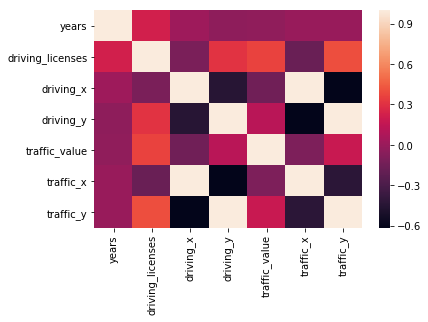

In [37]:
sns.heatmap(merged_df.corr())

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [0]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
     

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


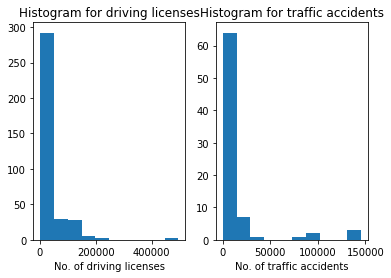

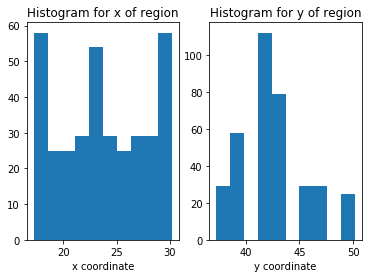

In [39]:
# Code
subplot_histograms(merged_df,["driving_licenses","traffic_value"],['Histogram for driving licenses','Histogram for traffic accidents'],["No. of driving licenses","No. of traffic accidents"])

subplot_histograms(merged_df,["driving_x","driving_y"],['Histogram for x of region','Histogram for y of region'],["x coordinate","y coordinate"])

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


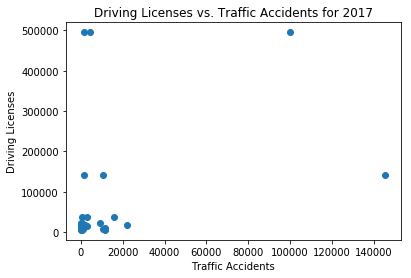

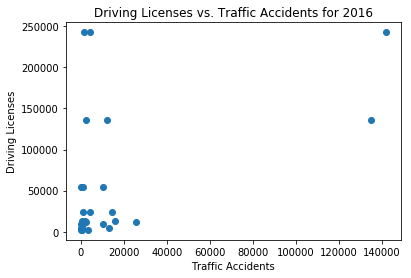

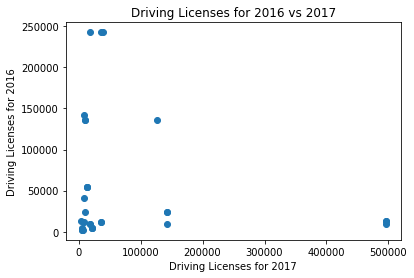

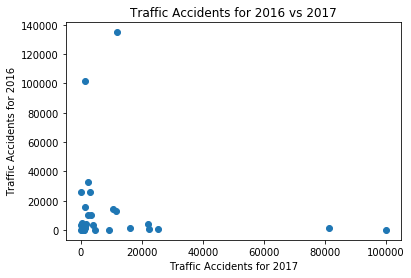

In [40]:
# Code
def plot_scatter(df, list_of_columns, year, title, labels):
#   list of columns should be x, y
  if len(list_of_columns) == 2:
    df = df[df.years == year]
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.scatter(df[list_of_columns[0]], df[list_of_columns[1]])
    ax.set_title(title)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])

def plot_different_year(df, column, list_of_years, title, labels):
  if len(list_of_years) == 2:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.scatter(df[df["years"] == list_of_years[0]][column], df[df["years"] == list_of_years[1]][column])
    ax.set_title(title)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    
plot_scatter(merged_df, ["traffic_value", "driving_licenses"], 2017, "Driving Licenses vs. Traffic Accidents for 2017", ["Traffic Accidents", "Driving Licenses"])
plot_scatter(merged_df, ["traffic_value", "driving_licenses"], 2016, "Driving Licenses vs. Traffic Accidents for 2016", ["Traffic Accidents", "Driving Licenses"])
plot_different_year(merged_df, "driving_licenses", [2017, 2016], "Driving Licenses for 2016 vs 2017", ["Driving Licenses for 2017", "Driving Licenses for 2016"])
plot_different_year(merged_df, "traffic_value", [2017, 2016], "Traffic Accidents for 2016 vs 2017", ["Traffic Accidents for 2017", "Traffic Accidents for 2016"])

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

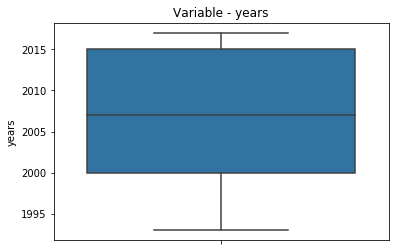

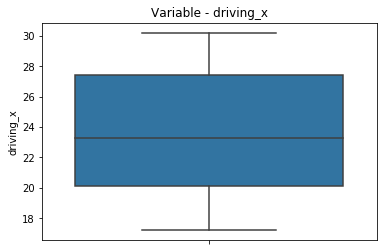

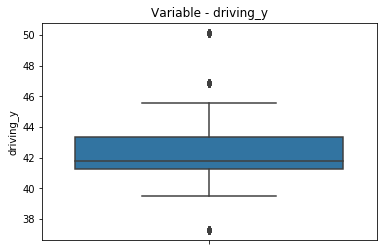

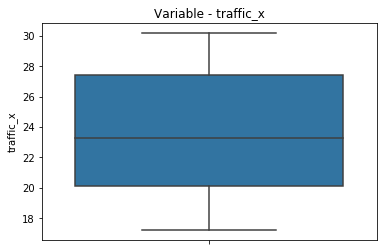

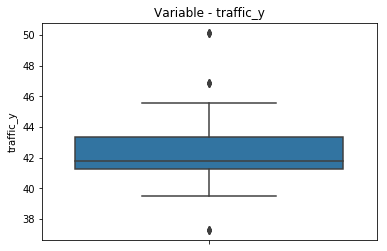

In [41]:
# Code
def plot_boxplot(dataframe, column, title):
  fig, ax = plt.subplots(nrows=1, ncols=1)
  sns.boxplot(dataframe[column], orient='vertical', ax=ax).set_title(title)
  
plot_boxplot(merged_df, 'years', 'Variable - years')
plot_boxplot(merged_df, 'driving_x', 'Variable - driving_x')
plot_boxplot(merged_df, 'driving_y', 'Variable - driving_y')
plot_boxplot(merged_df, 'traffic_x', 'Variable - traffic_x')
plot_boxplot(merged_df, 'traffic_y', 'Variable - traffic_y')

# traffic accidents and driving licenses have not similar scale but still you can plot them
# plot_boxplot(merged_df, 'driving_licenses', 'Variable - driving_licenses')
# plot_boxplot(merged_df, 'traffic_value', 'Variable - traffic_value')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

<Figure size 2160x216 with 0 Axes>

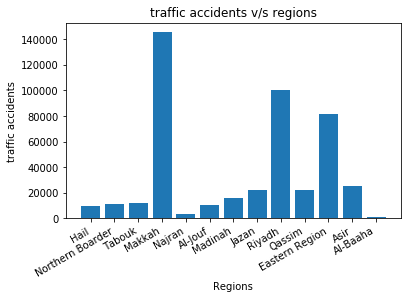

<Figure size 2160x216 with 0 Axes>

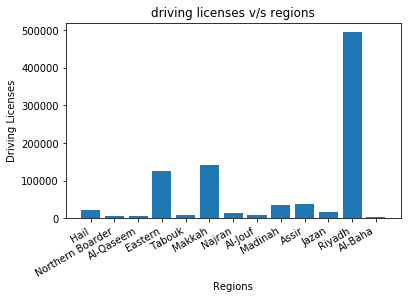

In [51]:
# Plotting traffic accidents v/s regions in 2017 to check which region has more accidents
def plot_traffic_regions(df, list_of_columns, year, title, labels):
  plt.figure(figsize=(30,3))
#   list of columns should be x, y
  if len(list_of_columns) == 2:
    df = df[np.isfinite(df[list_of_columns[0]])]
    df = df[df.years == year]
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.bar(df[list_of_columns[1]], df[list_of_columns[0]])
    ax.set_title(title)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    fig.autofmt_xdate()

plot_traffic_regions(merged_df, ['traffic_value', 'region'], 2017, "traffic accidents v/s regions", ['Regions', "traffic accidents"])
plot_traffic_regions(merged_df, ['driving_licenses', 'region'], 2017, "driving licenses v/s regions", ['Regions', "Driving Licenses"])

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers: Using pandas.describe() ,  We got the central tendency, spread and shape of the numerical datas in datasets.
We got the mean, standard deviation, percentiles, etc from which we can analyse our data before we can build our analytical tools.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Yes it is normally distributed a little bit we can observe it in histograms.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: No, for driving licenses , most of the people not have driving liceses leading to non normally distributed data. We can also observe this in histogram.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [50]:
# Code
# lets check null hypothesis for traffic_x and driving_x
# using pandas.decribe() to check the mean and standard deviation to fall within 95% of the population
stats = merged_df.describe()
# since mean of driving_x is more than traffic_x
z = stats["driving_x"]["mean"] - stats["traffic_x"]["mean"]
z /= stats["driving_x"]["std"]
if z < 0.05:     # for to be in 95 % of population
  print("Population for driving_x and traffic_x are same")
else:
  print("Population for driving_x and traffic_x are not same")
  
  
# lets check null hypothesis for traffic_y and driving_y
# using pandas.decribe() to check the mean and standard deviation to fall within 95% of the population
# since mean of driving_x is more than traffic_x
z = stats["driving_y"]["mean"] - stats["traffic_y"]["mean"]
z /= stats["driving_y"]["std"]
if z < 0.05:     # for to be in 95 % of population
  print("Population for driving_y and traffic_y are same")
else:
  print("Population for driving_y and traffic_y are not same")

Population for driving_x and traffic_x are same
Population for driving_y and traffic_y are same


## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer: Three regions should be (Makkah, Najran and Riyadha) where there are most traffic accidents, least traffic accidents and most driving licenses. These data will give a lot information to study the traffic accidents thier dependences since the population of both the datasets are same.

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer: In all of the cities if there are more driving licenses there are less traffic accidents and vice versa.

Additional data - We can also have a data where age group in traffic accidents can give us the information in which age group our drivin
g licenses must be made compulsary.